In [302]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import pandas as pd
import seaborn as sns

In [20]:
grants

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,14350000.0,32730000.0,16080000.0,34470000.0,39890000.0,36900000.0,...,5.952440e+09,5.720170e+09,4.332480e+09,4.339970e+09,3.820440e+09,3.642310e+09,74550000.0,NaN,NaN,NaN
2,Angola,AGO,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,0.0,1870000.0,NaN,10000.0,NaN,NaN,...,1.689300e+08,1.770700e+08,1.868000e+08,1.668200e+08,1.397700e+08,1.677300e+08,4550000.0,NaN,NaN,NaN
3,Albania,ALB,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.664400e+08,1.484700e+08,1.442400e+08,1.683700e+08,1.134000e+08,1.373200e+08,3670000.0,NaN,NaN,NaN
4,Andorra,AND,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.561900e+08,3.218000e+08,3.046700e+08,2.726100e+08,1.946700e+08,1.965700e+08,10690000.0,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,12880000.0,14940000.0,17330000.0,21590000.0,23490000.0,31300000.0,...,4.746500e+08,6.009400e+08,1.006540e+09,8.316800e+08,1.542770e+09,1.947800e+09,52340000.0,NaN,NaN,NaN
261,South Africa,ZAF,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.879800e+08,8.629700e+08,8.149200e+08,7.368500e+08,6.888600e+08,7.768900e+08,21020000.0,NaN,NaN,NaN
262,Zambia,ZMB,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,930000.0,1260000.0,2650000.0,1380000.0,14470000.0,12030000.0,...,8.639800e+08,7.947500e+08,9.866400e+08,7.985000e+08,6.120200e+08,7.039000e+08,14050000.0,NaN,NaN,NaN


In [21]:
grants['Indicator Code'].unique()

array(['BX.GRT.EXTA.CD.WD'], dtype=object)

## Data Wrangling

In [22]:
grants.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [23]:
grants.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              157
                 ... 
2016              123
2017              123
2018              264
2019              264
Unnamed: 64       264
Length: 65, dtype: int64

## rename columns


In [24]:
grants = grants.rename(columns={'Country Name':'country','Country Code':'country_code', 
                        'Indicator Name':'indicator', 'Indicator Code':'indicator_code'})

In [25]:
grants.head()

,country,country_code,indicator,indicator_code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,14350000.0,32730000.0,16080000.0,34470000.0,39890000.0,36900000.0,...,5.952440e+09,5.720170e+09,4.332480e+09,4.339970e+09,3.820440e+09,3.642310e+09,74550000.0,NaN,NaN,NaN
2,Angola,AGO,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,0.0,1870000.0,NaN,10000.0,NaN,NaN,...,1.689300e+08,1.770700e+08,1.868000e+08,1.668200e+08,1.397700e+08,1.677300e+08,4550000.0,NaN,NaN,NaN
3,Albania,ALB,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.664400e+08,1.484700e+08,1.442400e+08,1.683700e+08,1.134000e+08,1.373200e+08,3670000.0,NaN,NaN,NaN
4,Andorra,AND,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Energy

## CO2 Emissions

In [26]:
emissions = pd.read_csv('/Users/home/Ironhack/Week_6/Project/datasets/energy/co2_emissions/co2_emissions.csv')

## Data wrangling

In [27]:
emissions.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [28]:
emissions.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960               71
                 ... 
2016              264
2017              264
2018              264
2019              264
Unnamed: 64       264
Length: 65, dtype: int64

## rename columns

In [29]:
emissions = emissions.rename(columns={'Country Name':'country','Country Code':'country_code', 
                        'Indicator Name':'indicator', 'Indicator Code':'indicator_code'})

In [47]:
emissions

,country,country_code,indicator,indicator_code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,2508.228,2500.894,1349.456,861.745,872.746,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,8463.436,12240.446,10755.311,10014.577,9809.225,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,29057.308,30340.758,33399.036,32617.965,34763.160,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4598.418,5240.143,4910.113,5064.127,5716.853,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,517.047,491.378,487.711,476.710,462.042,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,3633.997,2665.909,3887.020,2918.932,3633.997,3931.024,...,23432.130,19666.121,18668.697,25496.651,22698.730,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,97934.569,102213.958,105767.281,109826.650,119657.877,128260.659,...,474099.096,470582.443,468770.945,466376.394,489771.854,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,3278.298,3916.356,...,2691.578,2937.267,3667.000,3956.693,4503.076,NaN,NaN,NaN,NaN,NaN


In [30]:
# emissions['Total'] = emissions.sum(axis=1)

## Turn years columns into one column

In [109]:
emissions.drop(columns='Unnamed: 64', inplace=True)

KeyError: "['Unnamed: 64'] not found in axis"

In [110]:
columns_list = list(emissions.columns)

In [111]:
del columns_list[0:4]

In [177]:
emissions = pd.melt(emissions, id_vars=['country', 'country_code'], value_vars= columns_list, var_name=['year'])

In [178]:
emissions.rename(columns={'value': 'co2_emissions'}, inplace=True)

In [179]:
emissions

,country,country_code,year,co2_emissions
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,414.371
2,Angola,AGO,1960,550.050
3,Albania,ALB,1960,2024.184
4,Andorra,AND,1960,NaN
...,...,...,...,...
15835,Kosovo,XKX,2019,NaN
15836,"Yemen, Rep.",YEM,2019,NaN
15837,South Africa,ZAF,2019,NaN
15838,Zambia,ZMB,2019,NaN


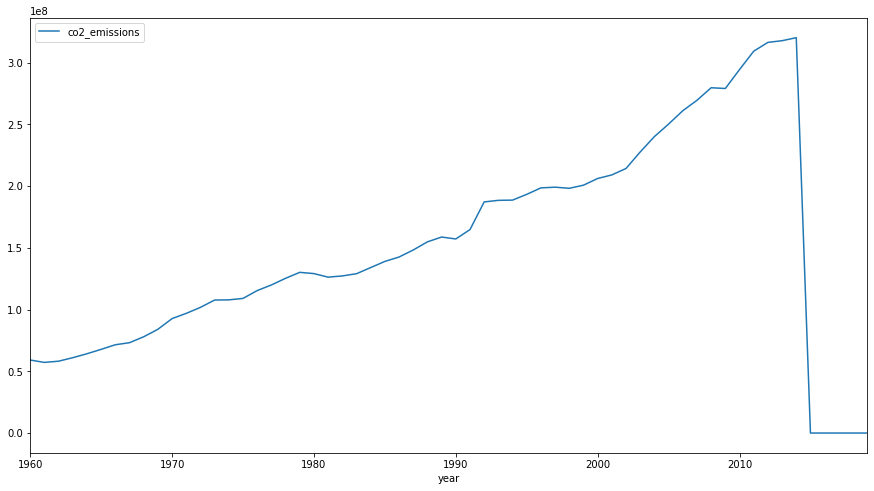

In [180]:
emissions_total = emissions.groupby(["year"]).agg({"co2_emissions":"sum"})
emissions_total.plot(figsize=(15,8))

In [116]:
emissions.to_csv('/Users/home/Ironhack/Week_6/Project/datasets/cleaned/co2_emissions_in_kt.csv', index=False)

In [181]:
emissions[emissions.country == 'Germany']

,country,country_code,year,co2_emissions
53,Germany,DEU,1960,NaN
317,Germany,DEU,1961,NaN
581,Germany,DEU,1962,NaN
845,Germany,DEU,1963,NaN
1109,Germany,DEU,1964,NaN
1373,Germany,DEU,1965,NaN
1637,Germany,DEU,1966,NaN
1901,Germany,DEU,1967,NaN
2165,Germany,DEU,1968,NaN
2429,Germany,DEU,1969,NaN


# Power consumption per capita

In [66]:
consumption = pd.read_csv('/Users/home/Ironhack/Week_6/Project/datasets/energy/electric_power_consumption/electric_power_consumption.csv')

In [67]:
consumption.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

## rename columns

In [69]:
consumption.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,207.013343,219.253430,280.214547,312.228825,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
consumption = consumption.rename(columns={'Country Name':'country','Country Code':'country_code', 
                        'Indicator Name':'indicator', 'Indicator Code':'indicator_code'})

In [71]:
consumption.drop(columns={'Unnamed: 64'}, inplace=True)

## Transpose year columns headers into one column

In [150]:
columns_list = list(consumption.columns)

In [151]:
del columns_list[0:4]

In [152]:
consumption = pd.melt(consumption, id_vars=['country', 'country_code'], value_vars= columns_list, var_name=['year'])

In [153]:
consumption.rename(columns={'value': 'kwh_per_capita'}, inplace=True)

In [161]:
consumption

,country,country_code,year,kwh_per_capita
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,NaN
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN
...,...,...,...,...
15835,Kosovo,XKX,2019,NaN
15836,"Yemen, Rep.",YEM,2019,NaN
15837,South Africa,ZAF,2019,NaN
15838,Zambia,ZMB,2019,NaN


In [168]:
consumption = consumption.astype({'year':'int64'})

In [170]:
consumption[consumption.year == 2010].sort_values(by='kwh_per_capita', ascending=False).head(10)

,country,country_code,year,kwh_per_capita
13312,Iceland,ISL,2010,51439.908691
13375,Norway,NOR,2010,24890.924010
13220,Bahrain,BHR,2010,18038.296021
13342,Luxembourg,LUX,2010,16829.962541
13325,Kuwait,KWT,2010,16757.334175
13273,Finland,FIN,2010,16484.094275
13233,Canada,CAN,2010,15269.745477
13421,Sweden,SWE,2010,14934.326965
13398,Qatar,QAT,2010,14209.242229
13368,North America,NAC,2010,13580.636042


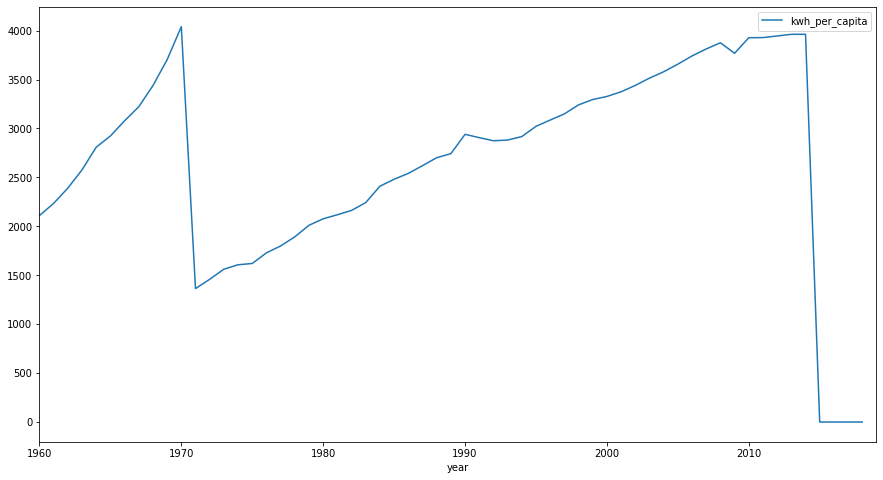

In [79]:
consumption_total = melted.groupby(["year"]).agg({"kwh_per_capita":"mean"})
consumption_total.plot(figsize=(15,8))

In [83]:
pwd

'/Users/home/Ironhack'

In [85]:
consumption.to_csv('/Users/home/Ironhack/Week_6/Project/datasets/cleaned/consumption_per_capita.csv', index=False)

In [175]:
consumption.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [182]:
consumption[consumption.country == 'Lower middle income']

,country,country_code,year,kwh_per_capita
137,Lower middle income,LMC,1960,NaN
401,Lower middle income,LMC,1961,NaN
665,Lower middle income,LMC,1962,NaN
929,Lower middle income,LMC,1963,NaN
1193,Lower middle income,LMC,1964,NaN
1457,Lower middle income,LMC,1965,NaN
1721,Lower middle income,LMC,1966,NaN
1985,Lower middle income,LMC,1967,NaN
2249,Lower middle income,LMC,1968,NaN
2513,Lower middle income,LMC,1969,NaN


# Renewable Energy ratio

In [86]:
renewables = pd.read_csv('/Users/home/Ironhack/Week_6/Project/datasets/energy/renewables_consumption/renewables_consumption.csv')

In [87]:
renewables.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [89]:
renewables = renewables.rename(columns={'Country Name':'country','Country Code':'country_code', 
                        'Indicator Name':'indicator', 'Indicator Code':'indicator_code'})

In [94]:
renewables.drop(columns= {'Unnamed: 64'}, inplace=True)

## Transpose

In [72]:
columns_list = list(renewables.columns)

In [73]:
del columns_list[0:4]

In [183]:
renewables = pd.melt(renewables, id_vars=['country', 'country_code'], value_vars= columns_list, var_name=['year'])

In [184]:
renewables.rename(columns={'value': 'renewables_percentage'}, inplace=True)

In [185]:
renewables.renewables_percentage.isna().sum()

9252

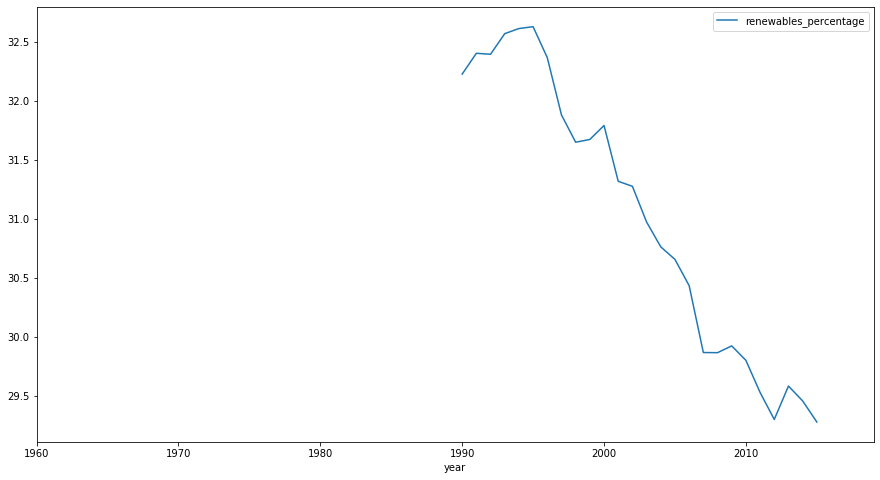

In [107]:
renewables_total = melt.groupby(["year"]).agg({"renewables_percentage":"mean"})
renewables_total.plot(figsize=(15,8))

In [120]:
renwables.to_csv('/Users/home/Ironhack/Week_6/Project/datasets/cleaned/renewable_energy_consumption.csv', index=False)

In [187]:
renewables.count()

country                  15840
country_code             15840
year                     15840
renewables_percentage     6588
dtype: int64

# World Population

In [123]:
population = pd.read_csv('/Users/home/Ironhack/Week_6/Project/datasets/energy/world_population/world_population.csv')

In [124]:
population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [126]:
population

,country,country_code,indicator,indicator_code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN,NaN


In [125]:
population = population.rename(columns={'Country Name':'country','Country Code':'country_code', 
                        'Indicator Name':'indicator', 'Indicator Code':'indicator_code'})

In [127]:
population.drop(columns={'Unnamed: 64'}, inplace=True)

## Transpose

In [128]:
columns_list = list(population.columns)

In [129]:
del columns_list[0:4]

In [188]:
population = pd.melt(population, id_vars=['country', 'country_code'], value_vars= columns_list, var_name=['year'])

In [189]:
population.rename(columns={'value': 'population'}, inplace=True)

In [190]:
population

,country,country_code,year,population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996973.0
2,Angola,AGO,1960,5454933.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
15835,Kosovo,XKX,2019,NaN
15836,"Yemen, Rep.",YEM,2019,NaN
15837,South Africa,ZAF,2019,NaN
15838,Zambia,ZMB,2019,NaN


In [192]:
population[population.country == 'OECD members'].head()

,country,country_code,year,population
179,OECD members,OED,1960,791309222.0
443,OECD members,OED,1961,803629386.0
707,OECD members,OED,1962,814576858.0
971,OECD members,OED,1963,825495463.0
1235,OECD members,OED,1964,836395330.0


In [133]:
population.to_csv('/Users/home/Ironhack/Week_6/Project/datasets/cleaned/world_population.csv', index=False)

In [134]:
population.count()

country         15840
country_code    15840
year            15840
population      15409
dtype: int64

In [208]:
oecd = pd.read_html('https://en.wikipedia.org/wiki/OECD', header=0)[5]
oecd.head()

,Country,Application,Negotiations,Invitation,Membership[1],Geographic location,Notes
0,Australia,NaN,NaN,NaN,7 June 1971,Oceania,NaN
1,Austria,NaN,NaN,NaN,29 September 1961,Europe,OEEC member.[6]
2,Belgium,NaN,NaN,NaN,13 September 1961,Europe,OEEC member.[6]
3,Canada,NaN,NaN,NaN,10 April 1961,North America,NaN
4,Chile,November 2003[52][53],16 May 2007[54],15 December 2009[55],7 May 2010,South America,NaN


In [278]:
oecd.Country.unique()[3]

'Canada'

In [289]:
def oecd_checker(string):
    for i in list(oecd.Country.unique()):
        if i in string:
            return "OECD"

In [290]:
population["OECD"] = population["country"].apply(oecd_checker)

In [297]:
oecd_pop = population[population.OECD == 'OECD'].groupby('year').agg({'population':'sum'})

In [301]:
oecd_pop.head()

,population
year,
1960,762228753.0
1961,773672046.0
1962,783825640.0
1963,793951699.0
1964,804083834.0
